In [1]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
import sys

# -- Detect if in Own Install or in Colab
try:
    import google.colab
    OWN_INSTALL = False
except:
    OWN_INSTALL = True
    
if OWN_INSTALL:
    
  #---- Leave these definitions ON if running on laptop
  #---- Else turn OFF by putting them between ''' ... '''

  sys.path[0:0] = ['../../../../..',  '../../../../../3rdparty',  
                   '../../../..',  '../../../../3rdparty',  
                   '../../..',     '../../../3rdparty', 
                   '../..',        '../../3rdparty',
                   '..',           '../3rdparty' ]

else: # In colab
  ! if [ ! -d Jove ]; then git clone https://github.com/ganeshutah/Jove Jove; fi
  sys.path.append('./Jove')
  sys.path.append('./Jove/jove')

# -- common imports --
from jove.DotBashers import *
from jove.Def_DFA import *
from jove.Def_NFA import *
from jove.Def_RE2NFA import *
from jove.Def_NFA2RE import *
from jove.Def_md2mc import *
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

You may use any of these help commands:
help(ResetStNum)
help(NxtStateStr)

You may use any of these help commands:
help(mkp_dfa)
help(mk_dfa)
help(totalize_dfa)
help(addtosigma_delta)
help(step_dfa)
help(run_dfa)
help(accepts_dfa)
help(comp_dfa)
help(flTup)
help(union_dfa)
help(intersect_dfa)
help(pruneUnreach)
help(iso_dfa)
help(langeq_dfa)
help(same_status)
help(h_langeq_dfa)
help(fixptDist)
help(min_dfa)
help(pairFR)
help(state_combos)
help(sepFinNonFin)
help(bash_eql_classes)
help(listminus)
help(bash_1)
help(mk_rep_eqc)
help(F_of)
help(rep_of_s)
help(q0_of)
help(Delta_of)
help(mk_state_eqc_name)

You may use any of these help commands:
help(mk_nfa)
help(totalize_nfa)
help(step_nfa)
help(run_nfa)
help(ec_step_nfa)
help(Eclosure)
help(Echelp)
help(accepts_nfa)
help(nfa2dfa)
help(n2d)
help(inSets)
help(rev_dfa)
help(min_dfa_brz)

You may use any of these help commands:
help(re2nfa)

You may use any of these help commands:
help(RE2Str)
help(mk_gnfa)
help(mk_gnfa_from_D)
help(dfa2nfa)

# THIS ENTIRE NOTEBOOK HELPS YOU WITH ASG-3

# RE to NFA

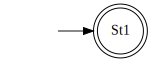

In [2]:
dotObj_nfa(re2nfa("''"))

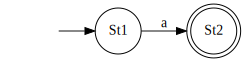

In [3]:
dotObj_nfa(re2nfa("a"))

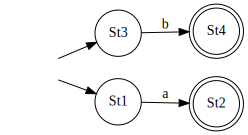

In [4]:
dotObj_nfa(re2nfa("a+b"))

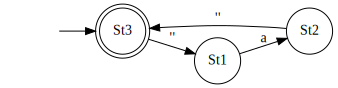

In [5]:
dotObj_nfa(re2nfa("a*"))

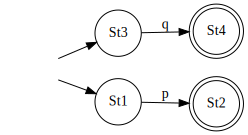

In [6]:
dotObj_nfa(re2nfa("(p+q)"))

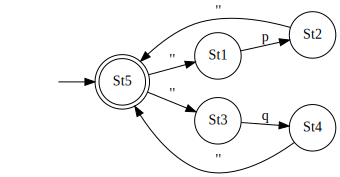

In [7]:
dotObj_nfa(re2nfa("(p+q)*"))

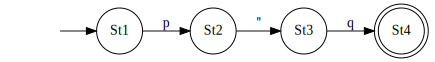

In [8]:
dotObj_nfa(re2nfa("pq"))

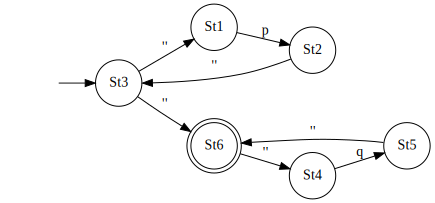

In [9]:
dotObj_nfa(re2nfa("p*q*"))

# Summarize RE to NFA conversion

In [10]:
R1 = "(0 0*      1)*"

In [11]:
R2 = "(0 (0+1)*  1)*"

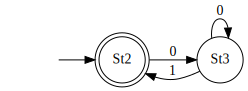

In [12]:
dotObj_dfa(min_dfa(nfa2dfa(re2nfa(R1))))

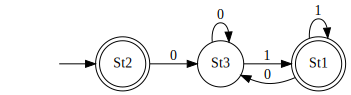

In [13]:
dotObj_dfa(min_dfa(nfa2dfa(re2nfa(R2))))

In [14]:
# Compute R1 - R2
dR1  = min_dfa(nfa2dfa(re2nfa(R1)))
dCR1 = comp_dfa(dR1)
dR2  = min_dfa(nfa2dfa(re2nfa(R2)))
dCR2 = comp_dfa(dR2)

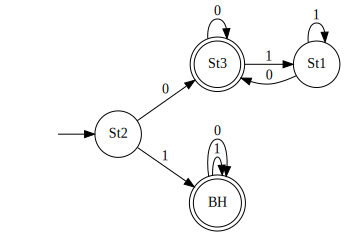

In [15]:
dotObj_dfa_w_bh(dCR2)

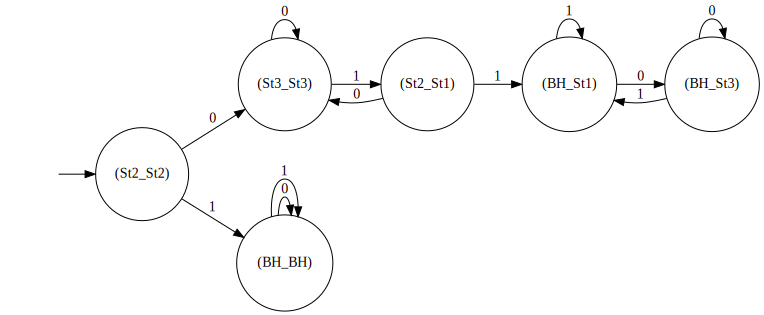

In [16]:
# R1 - R2
dR1_and_dCR2 = intersect_dfa(dR1,dCR2)
dotObj_dfa_w_bh(dR1_and_dCR2)

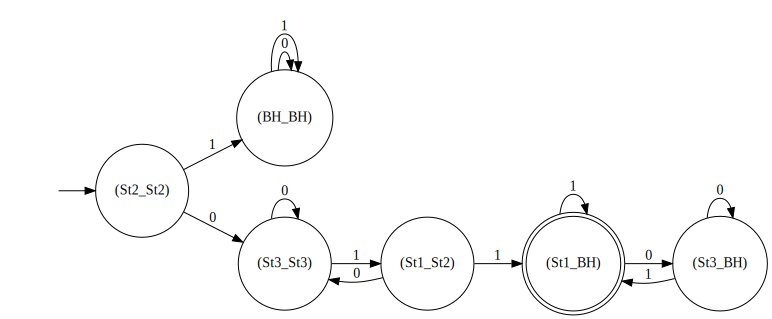

In [17]:
# R2 - R1
dR2_and_dCR1 = intersect_dfa(dR2,dCR1)
dotObj_dfa(dR2_and_dCR1)

# Now obtain an RE for complement(0(0+1)*)

## Build it and see if it makes sense

In [18]:
RE = "0(0+1)*"

In [19]:
cmdfa_RE = comp_dfa(min_dfa(nfa2dfa(re2nfa(RE))))

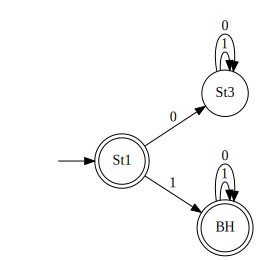

In [20]:
dotObj_dfa_w_bh(cmdfa_RE)

In [21]:
# Convert the above DFA to an NFA - processing convenience

ncRE = dfa2nfa(cmdfa_RE)

In [22]:
cmdfa_RE

{'Q': {'BH', 'St1', 'St3'},
 'Sigma': {'0', '1'},
 'Delta': {('St1', '1'): 'BH',
  ('St1', '0'): 'St3',
  ('BH', '1'): 'BH',
  ('BH', '0'): 'BH',
  ('St3', '1'): 'St3',
  ('St3', '0'): 'St3'},
 'q0': 'St1',
 'F': {'BH', 'St1'}}

In [23]:
ncRE

{'Q': {'BH', 'St1', 'St3'},
 'Sigma': {'0', '1'},
 'Delta': {('St1', '1'): {'BH'},
  ('St1', '0'): {'St3'},
  ('BH', '1'): {'BH'},
  ('BH', '0'): {'BH'},
  ('St3', '1'): {'St3'},
  ('St3', '0'): {'St3'}},
 'Q0': {'St1'},
 'F': {'BH', 'St1'}}

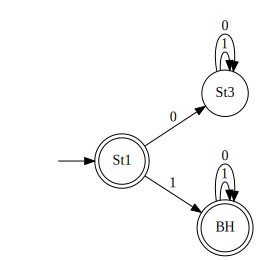

In [24]:
dotObj_nfa(ncRE)

In [25]:
# Make it into a GNFA
gncRE = mk_gnfa(ncRE)

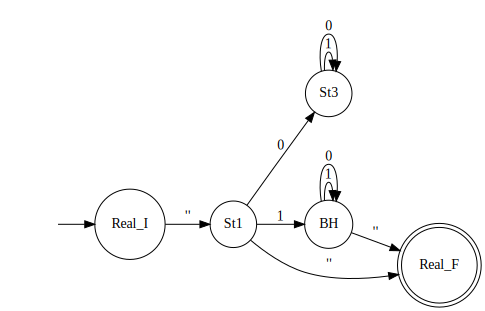

In [26]:
dotObj_gnfa(gncRE)

In [27]:
help(del_gnfa_states)

Help on function del_gnfa_states in module jove.Def_NFA2RE:

del_gnfa_states(Gin, DelList=[])
    Given a GNFA Gin with no unreachable states, 
    delete all states but f
    or Real_I and Real_F.
    If DelList is given, follow the state deletion
    order mentioned therein; else choose order internally.
    
    Return a triple (Gfinal, dotObj_List, final_re_str), where
      Gfinal       : the final GNFA
      dotObj_List  : a list of Dot objects recording the process of
                     deleting states and forming intermediate REs
      final_re_str : the final RE as a string (ready to be fed to  
                     re2nfa for converting back to an NFA)



In [28]:
(Gfinal, DO, RE) = del_gnfa_states(gncRE)

**** Eliminating state St1 ****
**** Eliminating state St3 ****
**** Eliminating state BH ****


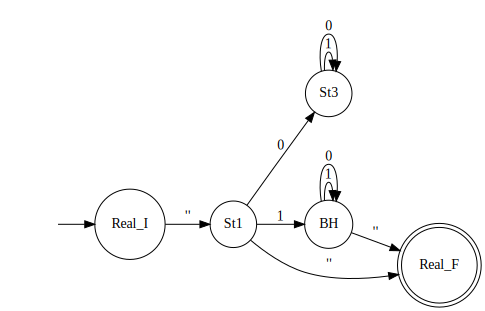

In [29]:
DO[0]

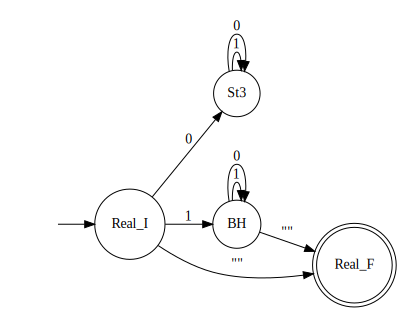

In [30]:
DO[1]

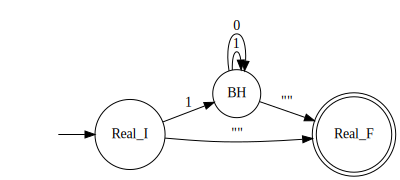

In [31]:
DO[2]

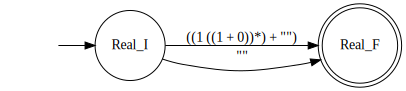

In [32]:
DO[3]

In [98]:
RE

'(((1 ((1 + 0))*) + "") + "")'

In [99]:
# Suppose you have to paste this RE to make (RE 1*)*, here is how you can do it
RE_onestar_star = "(" + RE + "1*" + ")*"

In [100]:
RE_onestar_star

'((((1 ((1 + 0))*) + "") + "")1*)*'

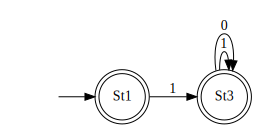

In [34]:
# Check that this RE is right

dotObj_dfa(min_dfa(nfa2dfa(re2nfa(RE))))

In [35]:
nfa1 = md2mc('''
NFA

IF : '' | a -> A

A  : '' | b -> B

B  : ''     -> C

C  : '' | a -> IF

C  : a | c  -> D

D  : a      -> F

''')

Generating LALR tables


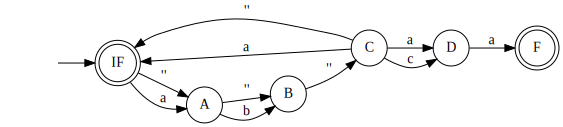

In [36]:
dotObj_nfa(nfa1)

# (2) What is the Delta value for C upon a, b, c, '' ?

In [37]:
nfa1

{'Q': {'A', 'B', 'C', 'D', 'F', 'IF'},
 'Sigma': {'a', 'b', 'c'},
 'Delta': {('IF', ''): {'A'},
  ('IF', 'a'): {'A'},
  ('A', ''): {'B'},
  ('A', 'b'): {'B'},
  ('B', ''): {'C'},
  ('C', ''): {'IF'},
  ('C', 'a'): {'D', 'IF'},
  ('C', 'c'): {'D'},
  ('D', 'a'): {'F'}},
 'Q0': {'IF'},
 'F': {'F', 'IF'}}

## It is this

$ \delta(C, a) = \{ D, IF \}$

$ \delta(C, b) =  \{ \}$

$ \delta(C, c) = \{ D \}$

$ \delta(C, \varepsilon) = \{ IF \} $

# Questions on NFA2DFA

# (3) Compute the Eclosure of IF

In [38]:
help(Eclosure)

Help on function Eclosure in module jove.Def_NFA:

Eclosure(N, S)
    In : N (consistent NFA)
         S (set of states of NFA to be Eclosed)
    Out: Eclosure of S (set of states).



In [39]:
Eclosure(nfa1, {'IF'})

{'A', 'B', 'C', 'IF'}

# (4) Compute NFA 2 DFA of nfa1

In [40]:
help(nfa2dfa)

Help on function nfa2dfa in module jove.Def_NFA:

nfa2dfa(N, STATENAME_MAXSIZE=20)
    In : N (consistent NFA), and optional STATENAME_MAXSIZE
         for the generated DFA states
    Out: A consistent DFA that is language-equivalent to N.



In [41]:
dfa1 = nfa2dfa(nfa1, STATENAME_MAXSIZE = 40)

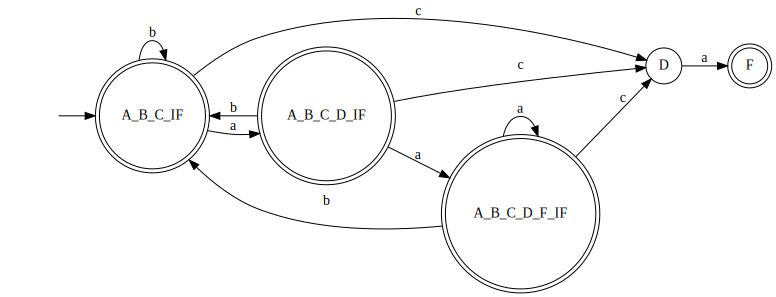

In [42]:
dotObj_dfa(dfa1, STATENAME_MAXSIZE = 40)

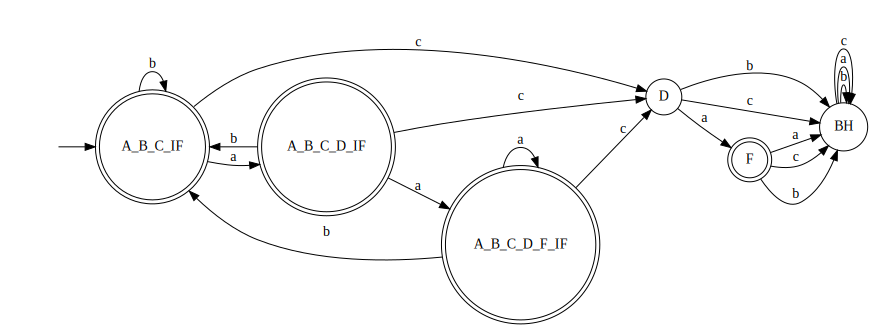

In [43]:
dotObj_dfa_w_bh(dfa1, STATENAME_MAXSIZE = 40)

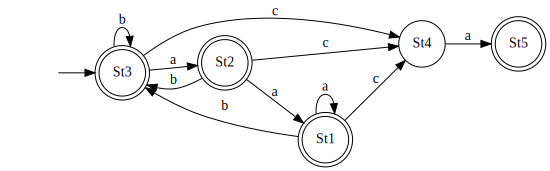

In [44]:
dotObj_dfa(dfa1, STATENAME_MAXSIZE = 10)

In [45]:
mdfa1 = min_dfa_brz(dfa1)

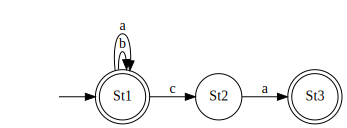

In [46]:
dotObj_dfa(mdfa1)

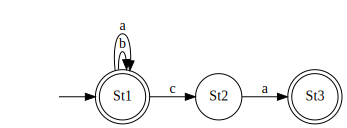

In [47]:
dotObj_dfa(min_dfa(dfa1))

In [48]:
langeq_dfa(mdfa1, dfa1)

True

In [49]:
iso_dfa(dfa1, mdfa1)

False

In [50]:
rdfa1 = rev_dfa(dfa1)

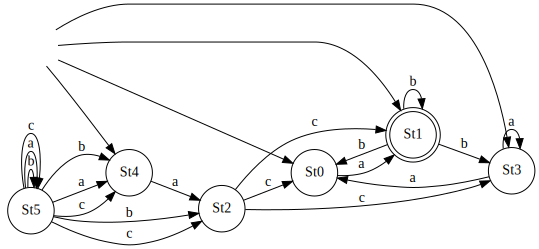

In [51]:
dotObj_nfa(rdfa1)

In [52]:
det_rdfa1 = nfa2dfa(rdfa1)

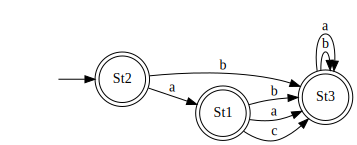

In [53]:
dotObj_dfa(det_rdfa1)

In [54]:
rev_det_rdfa1 = rev_dfa(det_rdfa1)

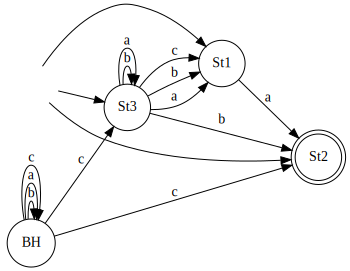

In [55]:
dotObj_nfa(rev_det_rdfa1)

In [56]:
det_rev_det_rdfa1 = nfa2dfa(rev_det_rdfa1)

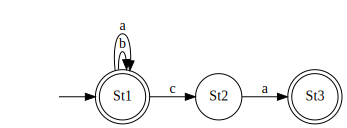

In [57]:
dotObj_dfa(det_rev_det_rdfa1)

# (5) Apply Brzozowski's Minimization on this DFA

In [58]:
X = md2mc('''
DFA

I   : a -> F1
 
F1  : a -> A

A   : a -> F2 

F2  : a -> I

''')

Generating LALR tables


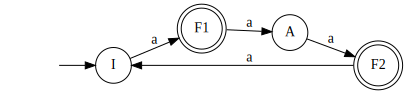

In [59]:
dotObj_dfa(X)

In [60]:
help(rev_dfa)

Help on function rev_dfa in module jove.Def_NFA:

rev_dfa(D)
    In : D = a partially consistent DFA without any unreachable states.
    Out: A consistent NFA whose language is D's language reversed.



In [61]:
rX = rev_dfa(X)

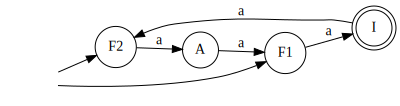

In [62]:
dotObj_nfa(rX)

In [63]:
drX = nfa2dfa(rX)

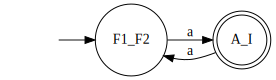

In [64]:
dotObj_dfa(drX)

In [65]:
rdrX = rev_dfa(drX)

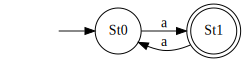

In [66]:
dotObj_nfa(rdrX)

In [67]:
drdrX = nfa2dfa(rdrX)

dotObj_dfa(drdrX)

# Questions on RE

# (6) What is the language denoted by this RE?

In [68]:
RE1 = "b(a+ab+b*)"

# (7) What is the language denoted by this RE?

In [69]:
RE2 = "b(a+b*)(''+b)"

# (8) Are there Strings in RE1 not in RE2?

In [70]:
DFA1 = min_dfa(nfa2dfa(re2nfa(RE1)))

In [71]:
DFA2 = min_dfa(nfa2dfa(re2nfa(RE2)))

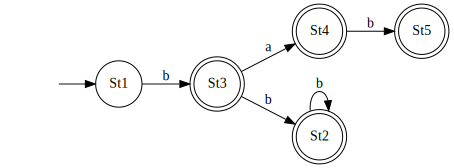

In [72]:
dotObj_dfa(DFA1)

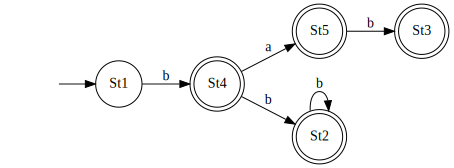

In [73]:
dotObj_dfa(DFA2)

In [74]:
CDFA1 = comp_dfa(DFA1)

In [75]:
CDFA2 = comp_dfa(DFA2)

In [76]:
DFA1_not2 = intersect_dfa(DFA1, CDFA2)

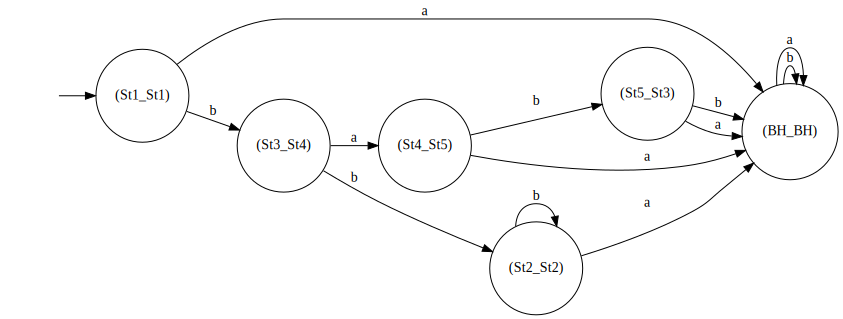

In [77]:
dotObj_dfa(DFA1_not2)

# (9) Are there Strings in RE2 not in RE1?

In [78]:
DFA2_not1 = intersect_dfa(DFA2, CDFA1)

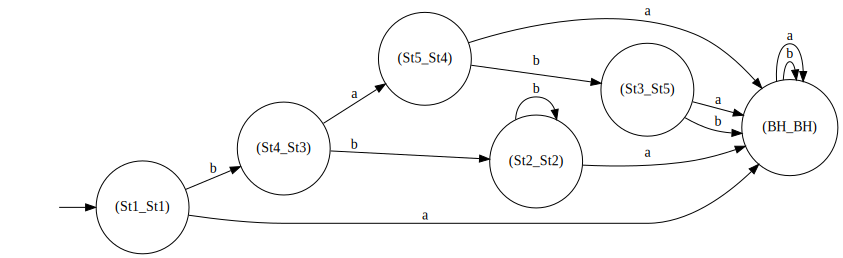

In [79]:
dotObj_dfa(DFA2_not1)

## Strings in RE2 not in RE1

# (10) Draw RE1 as an NFA

In [80]:
N1 = re2nfa(RE1)

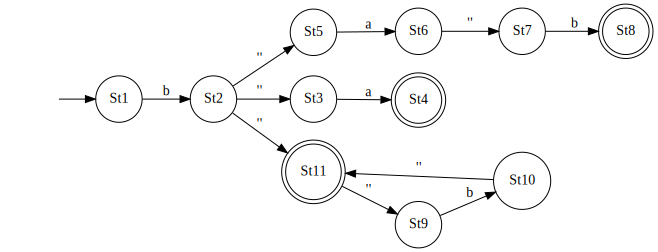

In [81]:
dotObj_nfa(N1)

# (11) Convert N1 into an RE

In [82]:
GN1 = mk_gnfa(N1)

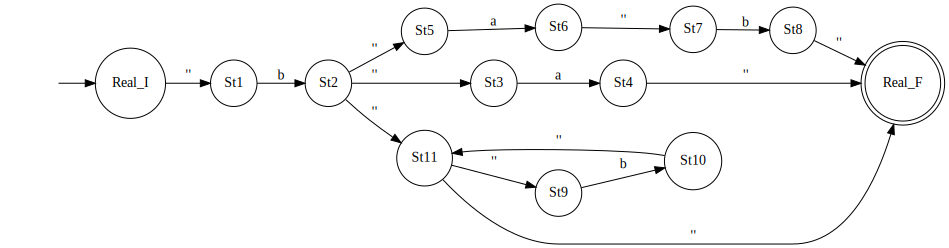

In [83]:
dotObj_gnfa(GN1)

In [84]:
help(del_gnfa_states)

Help on function del_gnfa_states in module jove.Def_NFA2RE:

del_gnfa_states(Gin, DelList=[])
    Given a GNFA Gin with no unreachable states, 
    delete all states but f
    or Real_I and Real_F.
    If DelList is given, follow the state deletion
    order mentioned therein; else choose order internally.
    
    Return a triple (Gfinal, dotObj_List, final_re_str), where
      Gfinal       : the final GNFA
      dotObj_List  : a list of Dot objects recording the process of
                     deleting states and forming intermediate REs
      final_re_str : the final RE as a string (ready to be fed to  
                     re2nfa for converting back to an NFA)



In [85]:
(Gfinal, DO, REfin) = del_gnfa_states(GN1)

**** Eliminating state St8 ****
**** Eliminating state St5 ****
**** Eliminating state St10 ****
**** Eliminating state St1 ****
**** Eliminating state St3 ****
**** Eliminating state St7 ****
**** Eliminating state St9 ****
**** Eliminating state St4 ****
**** Eliminating state St11 ****
**** Eliminating state St6 ****
**** Eliminating state St2 ****


In [86]:
REfin

'(b (((a b) + (((b)* + a) + a)) + (((b)* + a) + a)))'

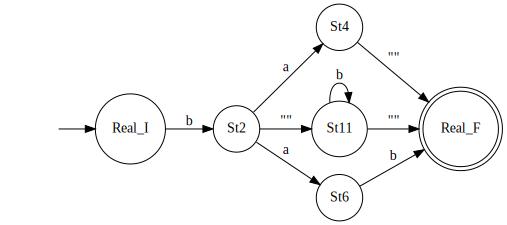

In [87]:
DO[7]

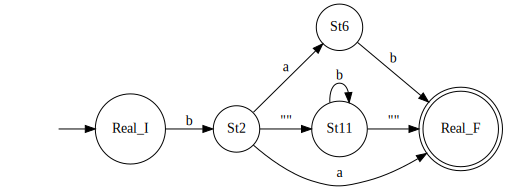

In [88]:
DO[8]

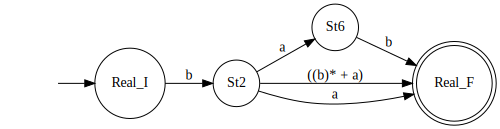

In [89]:
DO[9]

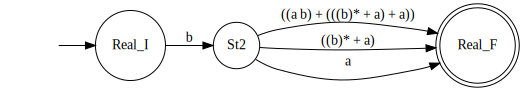

In [90]:
DO[10]

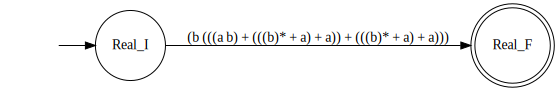

In [91]:
DO[11]

In [92]:
REfin

'(b (((a b) + (((b)* + a) + a)) + (((b)* + a) + a)))'

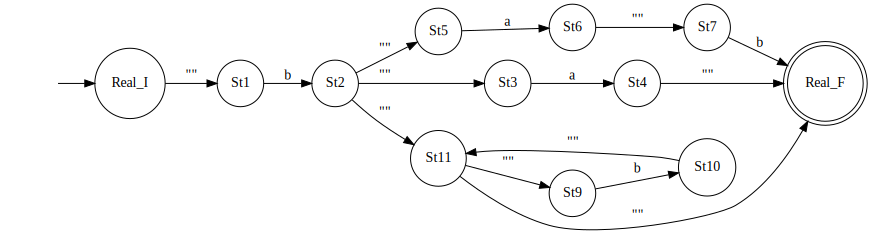

In [93]:
DO[1]

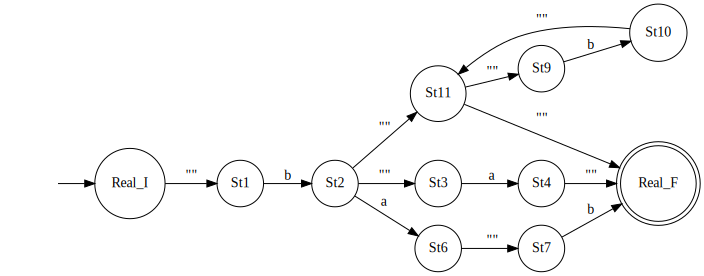

In [94]:
DO[2]

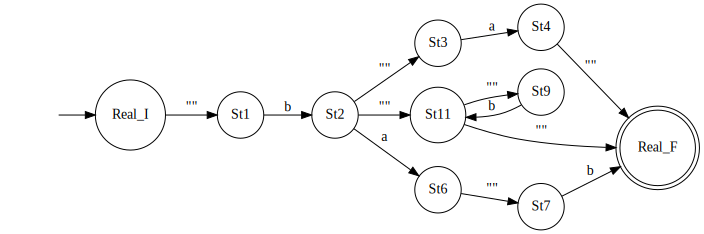

In [95]:
DO[3]

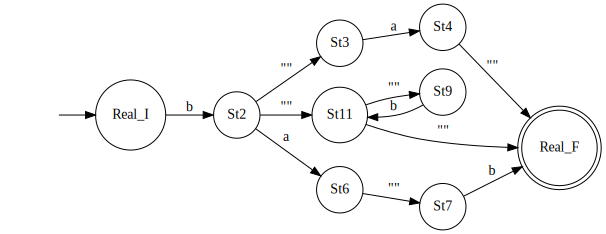

In [96]:
DO[4
   ]

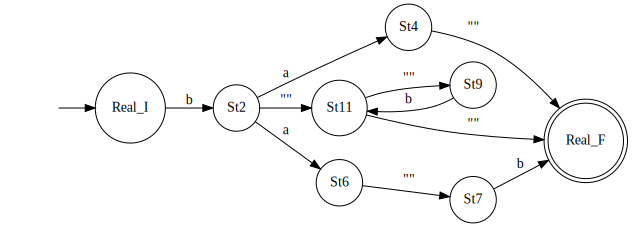

In [97]:
DO[5]